In [1]:
!pip install dash
!pip install --upgrade plotly dash

C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


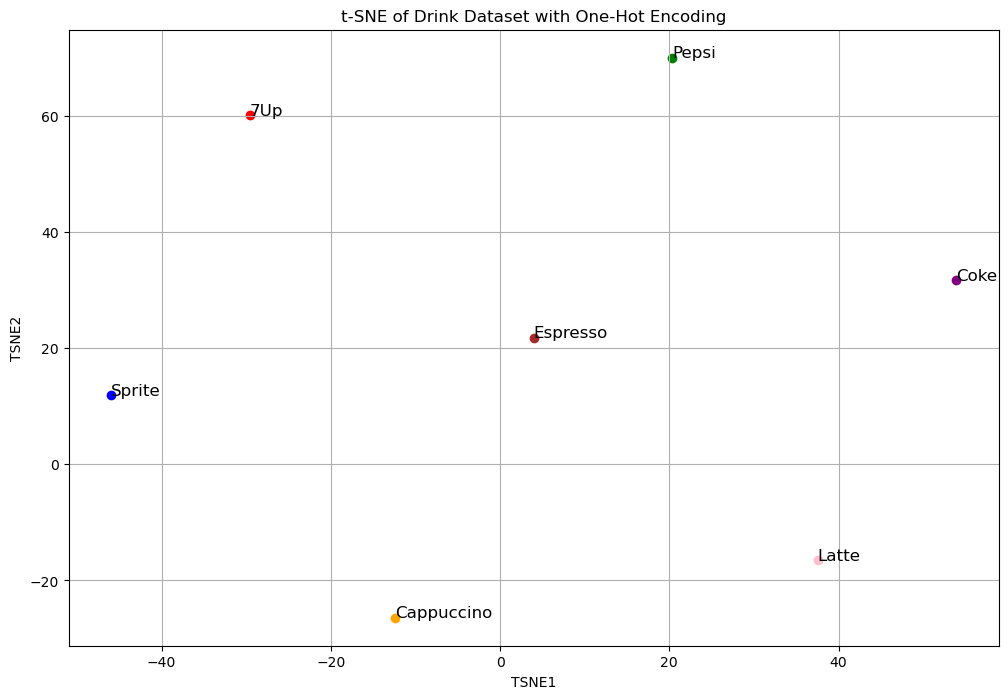

  Class       Drink  Rank Amount(μ,σ) Quantity(Range)  Count  Amount Mean  \
0     A         7Up     7  (100, 200)     (500, 1000)    100          100   
1     B      Sprite     6   (200, 10)     (500, 1000)    200          200   
2     C       Pepsi     5   (200, 10)     (500, 1000)    100          200   
3     D        Coke     4  (400, 100)     (500, 1000)    400          400   
4     E  Cappuccino     3   (800, 10)        (1, 500)    400          800   
5     F    Espresso     2   (800, 10)        (1, 500)    200          800   
6     G       Latte     1  (900, 400)        (1, 500)    100          900   

   Amount Std  Quantity Low  Quantity High      TSNE1      TSNE2  
0         200           500           1000 -29.594002  60.112713  
1          10           500           1000 -45.996586  11.891685  
2          10           500           1000  20.368856  70.019325  
3         100           500           1000  53.928768  31.704309  
4          10             1            500 -12.4

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder

# 定义生成单个数据点的函数
def generate_single_data_point(class_name, drink, rank, amount_mean, amount_std, quantity_low, quantity_high):
    amount = np.random.normal(loc=amount_mean, scale=amount_std)
    quantity = np.random.randint(low=quantity_low, high=quantity_high)
    return pd.DataFrame({
        'Class': [class_name],
        'Drink': [drink],
        'Rank': [rank],
        'Amount': [amount],
        'Quantity': [quantity]
    })

# 定义Drink Dataset
data = {
    'Class': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'Drink': ['7Up', 'Sprite', 'Pepsi', 'Coke', 'Cappuccino', 'Espresso', 'Latte'],
    'Rank': [7, 6, 5, 4, 3, 2, 1],
    'Amount(μ,σ)': [(100, 200), (200, 10), (200, 10), (400, 100), (800, 10), (800, 10), (900, 400)],
    'Quantity(Range)': [(500, 1000), (500, 1000), (500, 1000), (500, 1000), (1, 500), (1, 500), (1, 500)],
    'Count': [100, 200, 100, 400, 400, 200, 100]  # 初始定义的Count值
}

# 转换 'Amount(μ,σ)' 和 'Quantity(Range)' 列为单独的列
data['Amount Mean'] = [x[0] for x in data['Amount(μ,σ)']]
data['Amount Std'] = [x[1] for x in data['Amount(μ,σ)']]
data['Quantity Low'] = [x[0] for x in data['Quantity(Range)']]
data['Quantity High'] = [x[1] for x in data['Quantity(Range)']]

# 生成数据
data_df = pd.DataFrame(data)

# 1-of-k 编码
one_hot_encoder = OneHotEncoder()
one_hot_encoded = one_hot_encoder.fit_transform(data_df[['Drink']]).toarray()

# 将1-of-k编码结果与其他特征结合
features = np.hstack([one_hot_encoded, data_df[['Rank', 'Amount Mean', 'Amount Std', 'Quantity Low', 'Quantity High']].values])

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(features)

# 将t-SNE结果添加到数据集中
data_df['TSNE1'] = tsne_results[:, 0]
data_df['TSNE2'] = tsne_results[:, 1]


# 可视化结果
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink']
for i, drink in enumerate(data_df['Drink']):
    plt.scatter(data_df['TSNE1'].iloc[i], data_df['TSNE2'].iloc[i], color=colors[i], label=drink if i == 0 else "")

# 添加饮料名称标签
for i, drink in enumerate(data_df['Drink']):
    plt.text(data_df['TSNE1'].iloc[i], data_df['TSNE2'].iloc[i], drink, fontsize=12)

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('t-SNE of Drink Dataset with One-Hot Encoding')
plt.grid(True)
plt.show()

print(data_df)


In [6]:
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import numpy as np
import pandas as pd
import plotly.express as px
import json
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder

# Define the function to generate a single data point
def generate_single_data_point(class_name, drink, rank, amount_mean, amount_std, quantity_low, quantity_high):
    amount = np.random.normal(loc=amount_mean, scale=amount_std)
    quantity = np.random.randint(low=quantity_low, high=quantity_high)
    return pd.DataFrame({
        'Class': [class_name],
        'Drink': [drink],
        'Rank': [rank],
        'Amount': [amount],
        'Quantity': [quantity]
    })

# Define the Drink Dataset
data = {
    'Class': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'Drink': ['7Up', 'Sprite', 'Pepsi', 'Coke', 'Cappuccino', 'Espresso', 'Latte'],
    'Rank': [7, 6, 5, 4, 3, 2, 1],
    'Amount(μ,σ)': [(100, 200), (200, 10), (200, 10), (400, 100), (800, 10), (800, 10), (900, 400)],
    'Quantity(Range)': [(500, 1000), (500, 1000), (500, 1000), (500, 1000), (1, 500), (1, 500), (1, 500)],
    'Count': [100, 200, 100, 400, 400, 200, 100]
}

# Convert 'Amount(μ,σ)' and 'Quantity(Range)' to separate columns
data['Amount Mean'] = [x[0] for x in data['Amount(μ,σ)']]
data['Amount Std'] = [x[1] for x in data['Amount(μ,σ)']]
data['Quantity Low'] = [x[0] for x in data['Quantity(Range)']]
data['Quantity High'] = [x[1] for x in data['Quantity(Range)']]

# Generate DataFrame
data_df = pd.DataFrame(data)

# Drop the original combined columns
data_df.drop(columns=['Amount(μ,σ)', 'Quantity(Range)'], inplace=True)

# One-hot encode 'Drink'
one_hot_encoder = OneHotEncoder()
one_hot_encoded = one_hot_encoder.fit_transform(data_df[['Drink']]).toarray()

# Combine one-hot encoded features with other features
features = np.hstack([one_hot_encoded, data_df[['Rank', 'Amount Mean', 'Amount Std', 'Quantity Low', 'Quantity High']].values])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(features)

# Add t-SNE results to the DataFrame
data_df['TSNE1'] = tsne_results[:, 0]
data_df['TSNE2'] = tsne_results[:, 1]

# Create Plotly figure
fig = px.scatter(data_df, x='TSNE1', y='TSNE2', color='Drink', text='Drink',
                 title='t-SNE of Drink Dataset with One-Hot Encoding')

# Initialize Dash app
app = dash.Dash(__name__)

styles = {
    'pre': {
        'border': 'thin lightgrey solid',
        'overflowX': 'scroll'
    },
    'column': {
        'display': 'inline-block',
        'width': '33%'
    }
}

app.layout = html.Div([
    dcc.Graph(
        id='basic-interactions',
        figure=fig
    ),

    html.Div([
        dcc.Markdown("""
            **Hover Data**

            Mouse over values in the graph.
        """),
        html.Pre(id='hover-data', style=styles['pre'])
    ], style=styles['column']),

    html.Div([
        dcc.Markdown("""
            **Click Data**

            Click on points in the graph.
        """),
        html.Pre(id='click-data', style=styles['pre'])
    ], style=styles['column']),

    html.Div([
        dcc.Markdown("""
            **Selection Data**

            Choose the lasso or rectangle tool in the graph's menu
            bar and then select points in the graph.
        """),
        html.Pre(id='selected-data', style=styles['pre'])
    ], style=styles['column'])
])


@app.callback(
    Output('hover-data', 'children'),
    [Input('basic-interactions', 'hoverData')]
)
def display_hover_data(hoverData):
    return json.dumps(hoverData, indent=2)


@app.callback(
    Output('click-data', 'children'),
    [Input('basic-interactions', 'clickData')]
)
def display_click_data(clickData):
    return json.dumps(clickData, indent=2)


@app.callback(
    Output('selected-data', 'children'),
    [Input('basic-interactions', 'selectedData')]
)
def display_selected_data(selectedData):
    return json.dumps(selectedData, indent=2)


if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

